In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-10-21 18:24:29.426411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### CSV 파일 불러오기

In [2]:
df = pd.read_csv("abalone.csv", index_col=0)
df

FileNotFoundError: [Errno 2] No such file or directory: 'abalone.csv'

# 머신러닝 분류

### 데이터 전처리

In [76]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

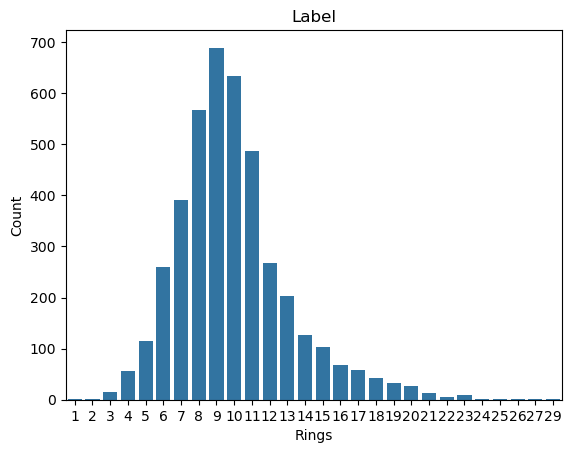

In [77]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [78]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [79]:
(df == 0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [80]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [81]:
cols_to_check = ['Height']
df = df[df[cols_to_check].ne(0).all(axis=1)]
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [82]:
(df == 0).sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [83]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [84]:
df['Sex'] = df['Sex'].map({'M': 1, 'I': 0, 'F': -1})
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


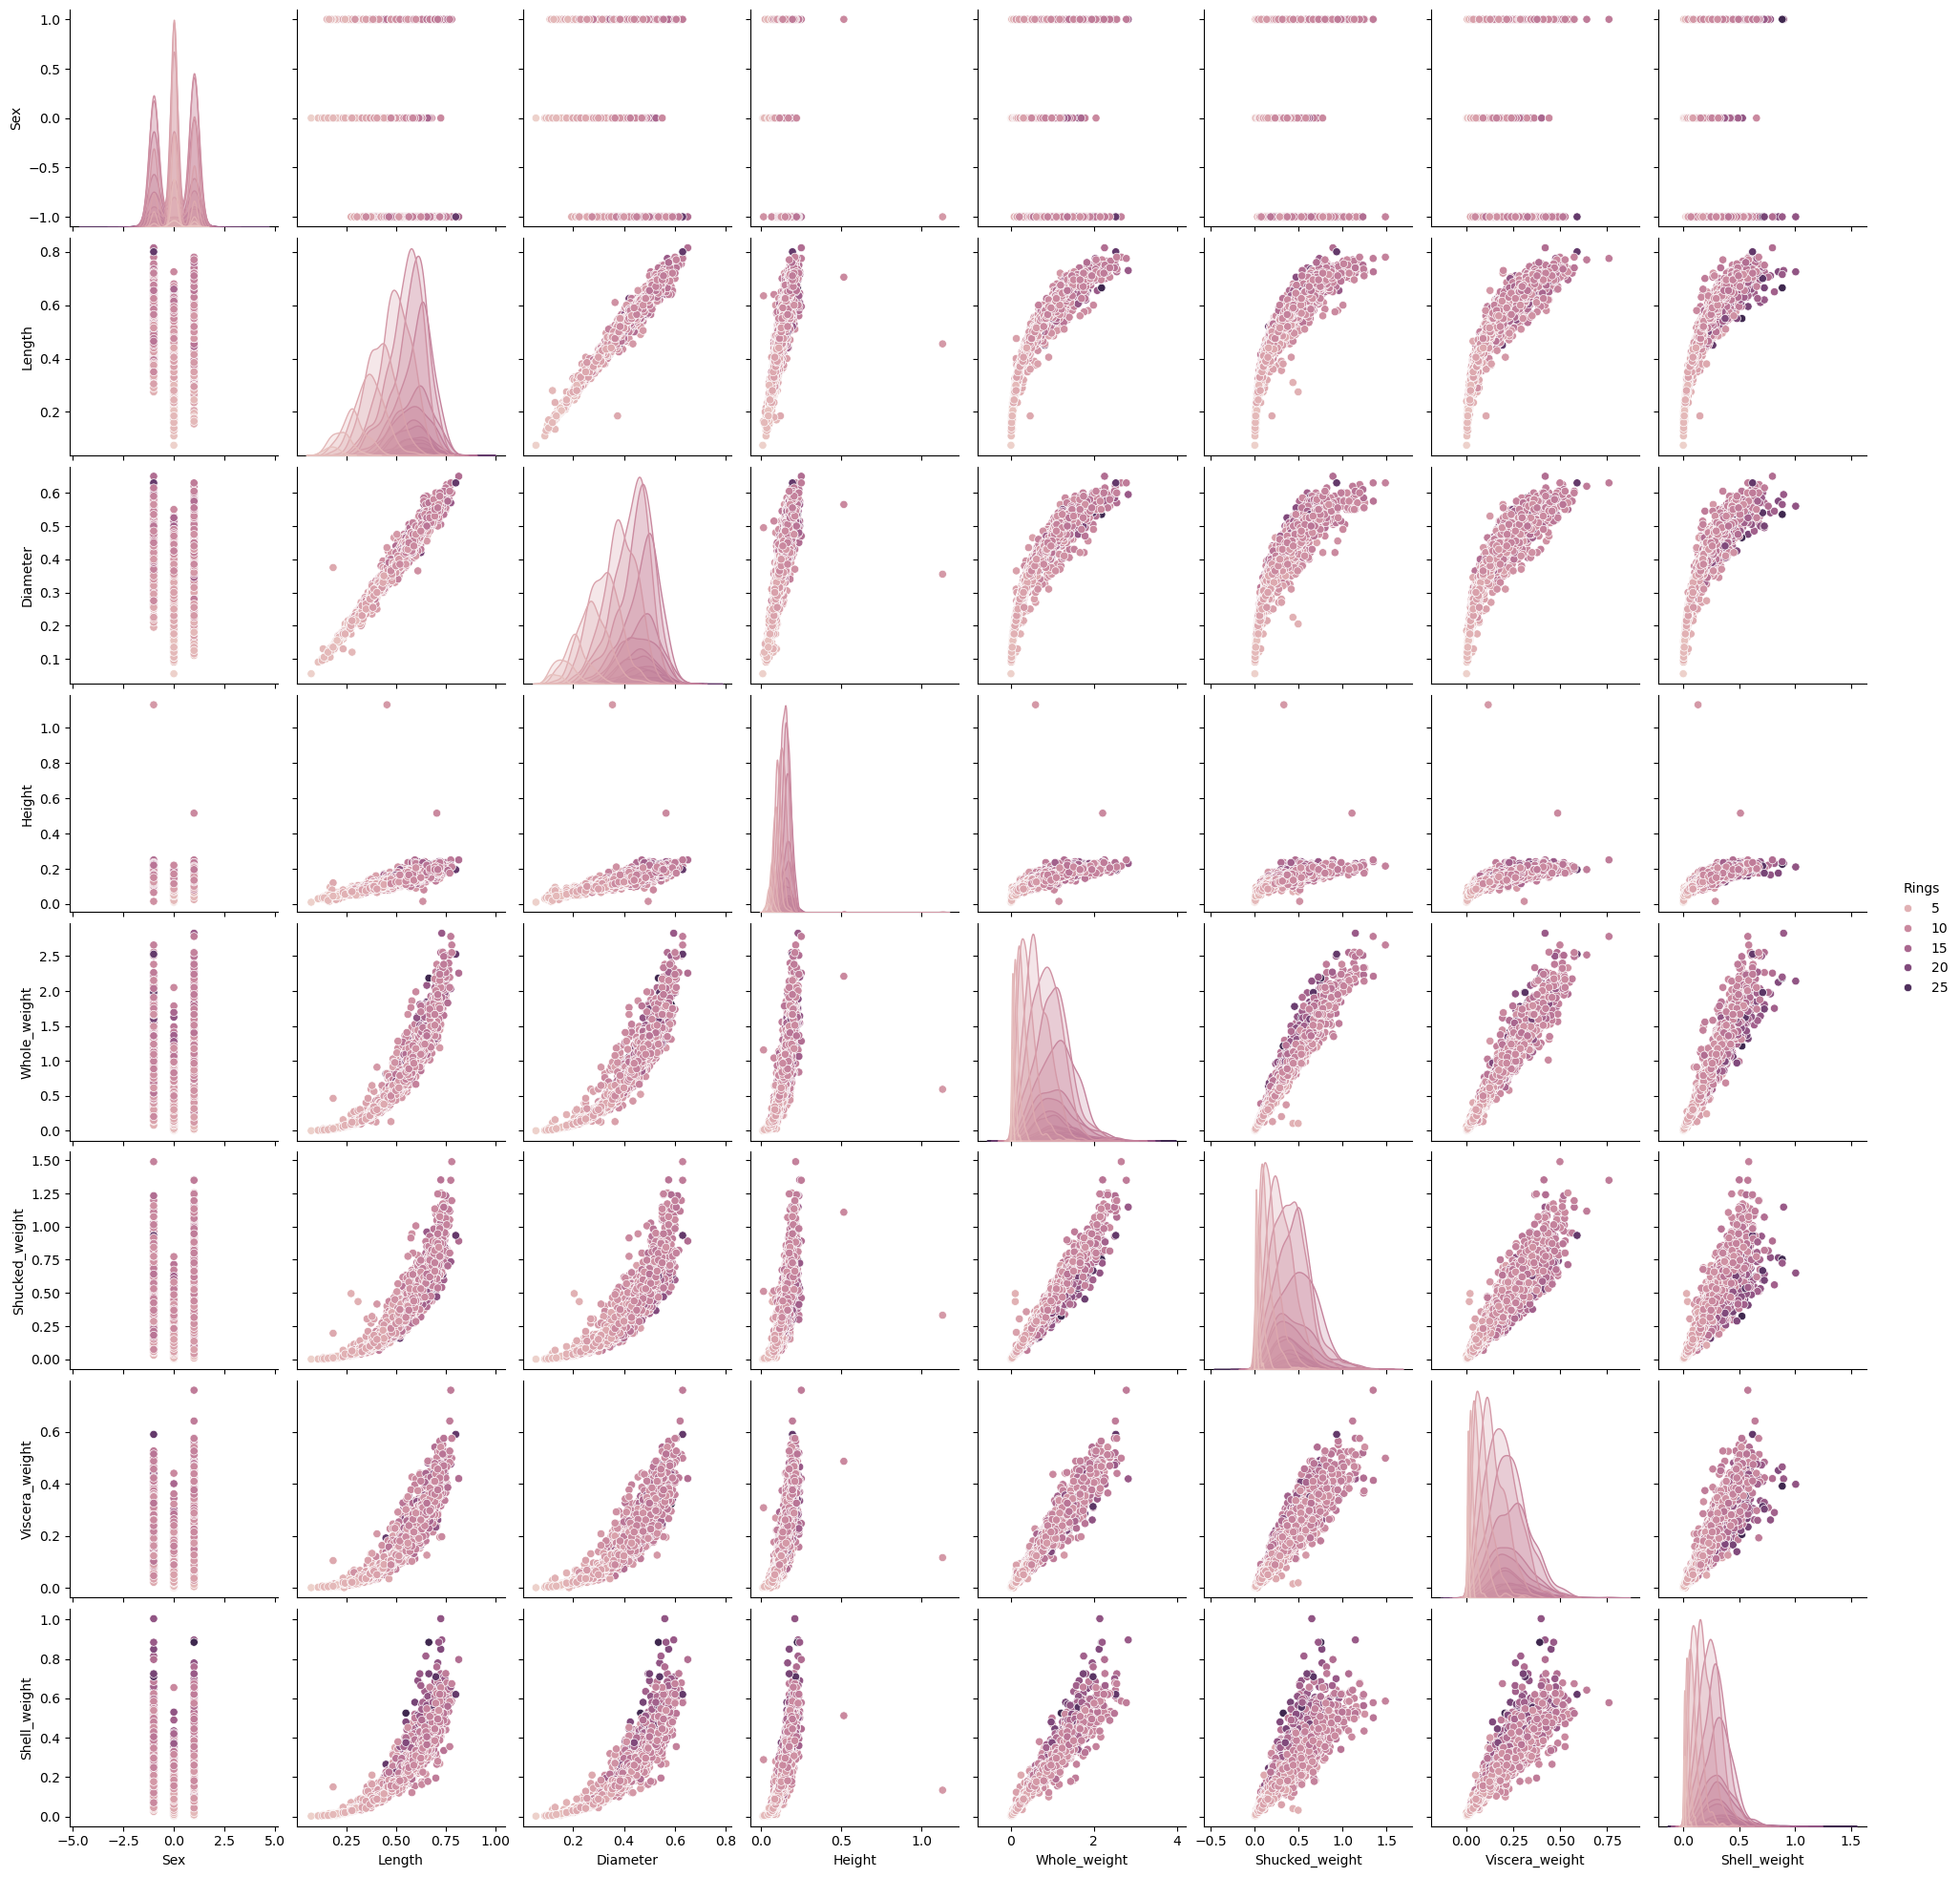

In [85]:
sns.pairplot(df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
            hue ='Rings')
plt.show()

In [86]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [91]:
y=df['Rings']
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### SVM 분류

In [92]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.25766283524904215
[[ 0  4  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0 23  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 25 16  3  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24 30 19 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8 15 48 66  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 25 91 36  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  9 95 49 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  7 57 35 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 40 15 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 20 13 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 17  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 12  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 

### LR 분류

In [93]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.26053639846743293
[[ 0  0  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15 28  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15 43 32 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 20 51 60  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 13 28 79 39  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 12 18 65 59 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 15 40 40 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 11 23 15 21  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 17 14 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 12 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 10  9  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0

### KNN 분류

In [94]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
0.2413793103448276
[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 12  9  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 24 17  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 30 31 24  9  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 11 29 59 29  9  3  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 13 43 44 30 19  6  2  1  2  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  7 11 22 47 41 28  6  3  0  1  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  2 14 31 33 29  6  6  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  9 17 17 14  5  5  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  9  8 12 12  1  2  3  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5  2  3  7  3  5  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  6  5  7  3  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  

### DT 분류

In [95]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.18773946360153257
[[ 0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  6  4 12  4  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6 16 12 12  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 21 30 18 14  7  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  1  9 19 45 32 24  9  3  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 16 33 32 37 22  7  8  2  1  0  2  1  0  1  0  0  0  0  0]
 [ 0  0  0  5 13 14 37 29 31 13 11  7  3  1  1  0  1  3  0  0  0  0  0]
 [ 0  0  0  1  6  7 26 28 22 11  8  5  4  6  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  1  3  6 10 15 11  7  9  1  1  4  3  0  2  0  0  2  0  0  0]
 [ 0  0  0  0  1  8  3  7  8  4  4  6  2  2  1  2  2  2  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  7  2  1  4  1  1  2  1  0  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  3  5  1  3  4  4  2  0  1  1  1  1  0  0  0  0  0  0]
 [ 0  0  0

### RF 분류

In [96]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))



--- Radom Forest ---
0.24808429118773948
[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 10 13  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 18 20  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 28 31 28  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8 26 50 39 13  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13 37 50 35 23  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  5 19 57 46 26  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 13 26 38 36  4  3  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  6 20 15 19  5  3  1  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  1  5  8 15 14  0  5  1  0  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4  7  7  1  4  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  5  4  7  2  1  1  1  1  1  0  0  0  0

## 딥러닝 분류

In [98]:
y=df['Rings']
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [110]:
X=df.drop('Rings',axis=1)
X = X.values
X



array([[ 1.    ,  0.455 ,  0.365 , ...,  0.2245,  0.101 ,  0.15  ],
       [ 1.    ,  0.35  ,  0.265 , ...,  0.0995,  0.0485,  0.07  ],
       [-1.    ,  0.53  ,  0.42  , ...,  0.2565,  0.1415,  0.21  ],
       ...,
       [ 1.    ,  0.6   ,  0.475 , ...,  0.5255,  0.2875,  0.308 ],
       [-1.    ,  0.625 ,  0.485 , ...,  0.531 ,  0.261 ,  0.296 ],
       [ 1.    ,  0.71  ,  0.555 , ...,  0.9455,  0.3765,  0.495 ]])

In [111]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(28,activation='softmax'))

model.compile(Adam(learning_rate=0.0001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                90        
                                                                 
 dense_17 (Dense)            (None, 8)                 88        
                                                                 
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
 dense_19 (Dense)            (None, 28)                196       
                                                                 
Total params: 428
Trainable params: 428
Non-trainable params: 0
_________________________________________________________________


In [117]:
model_history=model.fit(x=X_train, y=y_train, epochs=10, batch_size=30, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/10
112/112 [==============================] - 1s 2ms/step - loss: 3.3415 - accuracy: 0.0219 - val_loss: 3.3106 - val_accuracy: 0.0180
Epoch 2/10
112/112 [==============================] - 0s 793us/step - loss: 3.2806 - accuracy: 0.0305 - val_loss: 3.2473 - val_accuracy: 0.0275
Epoch 3/10
112/112 [==============================] - 0s 786us/step - loss: 3.2194 - accuracy: 0.0431 - val_loss: 3.1836 - val_accuracy: 0.0479
Epoch 4/10
112/112 [==============================] - 0s 769us/step - loss: 3.1580 - accuracy: 0.0548 - val_loss: 3.1212 - val_accuracy: 0.0587
Epoch 5/10
112/112 [==============================] - 0s 757us/step - loss: 3.0982 - accuracy: 0.0802 - val_loss: 3.0609 - val_accuracy: 0.0934
Epoch 6/10
112/112 [==============================] - 0s 786us/step - loss: 3.0414 - accuracy: 0.0973 - val_loss: 3.0048 - val_accuracy: 0.1042
Epoch 7/10
112/112 [==============================] - 0s 773us/step - loss: 2.9884 - accuracy: 0.1365 - val_loss: 2.9525 - val_accuracy: 0

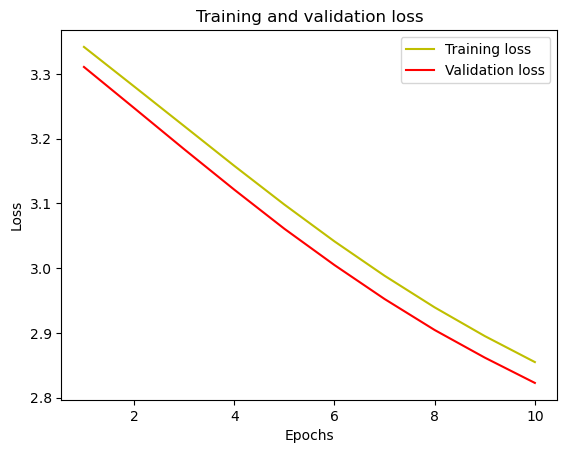

In [118]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

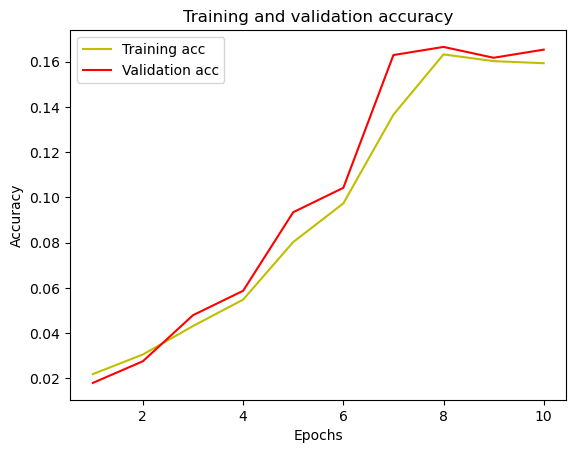

In [119]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        82
           7       0.00      0.00      0.00       110
           8       0.16      0.69      0.25       131
           9       0.19      0.33      0.24       144
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00        58
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         7
          19       0.00    

## 머신러닝 회귀

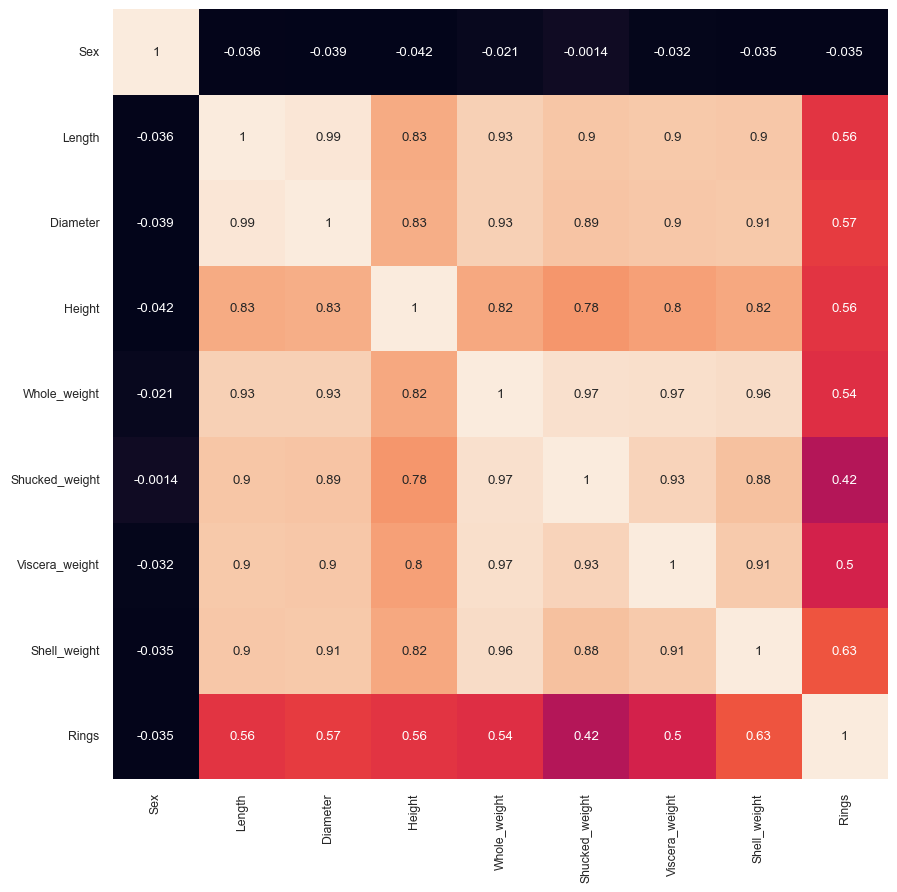

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [122]:
X = df.drop(['Rings'], axis=1)
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [123]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

### Linear 회귀

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error
    
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse_np(ly_preds, y_test))
print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 5.13574530482317
평균제곱근오차 5.13574530482317
평균제곱근오차 5.13574530482317


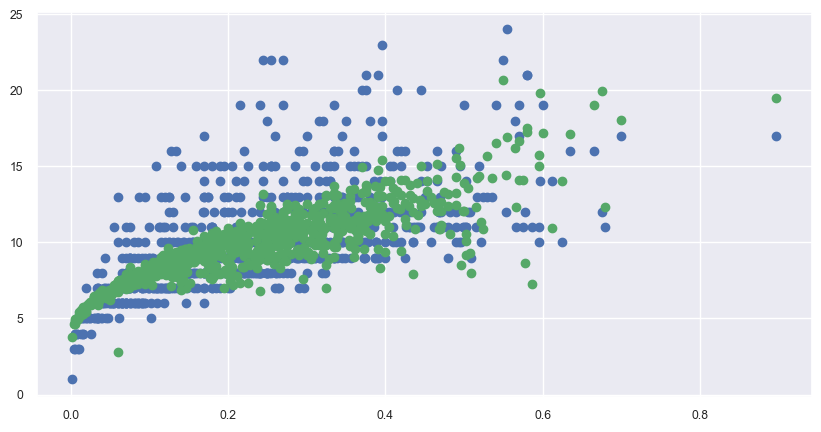

In [126]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='g', label='ly_preds')
plt.show()   

### Decision Tree 회귀

In [127]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.449101796407186


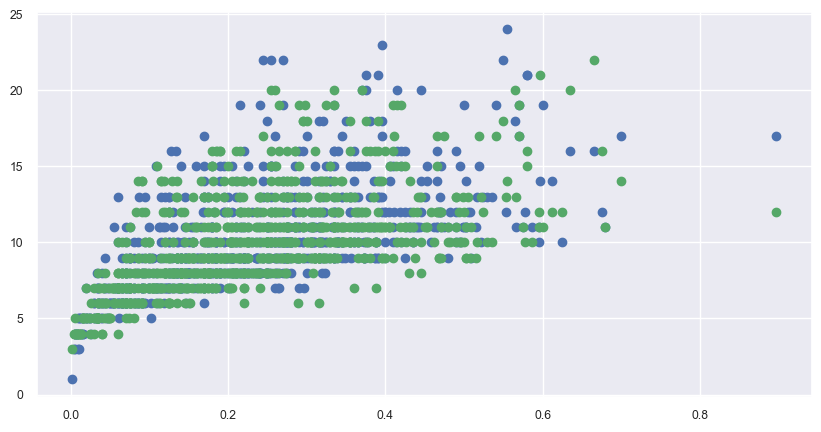

In [128]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()   

### Random Forest 회귀

In [129]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.009458922155688


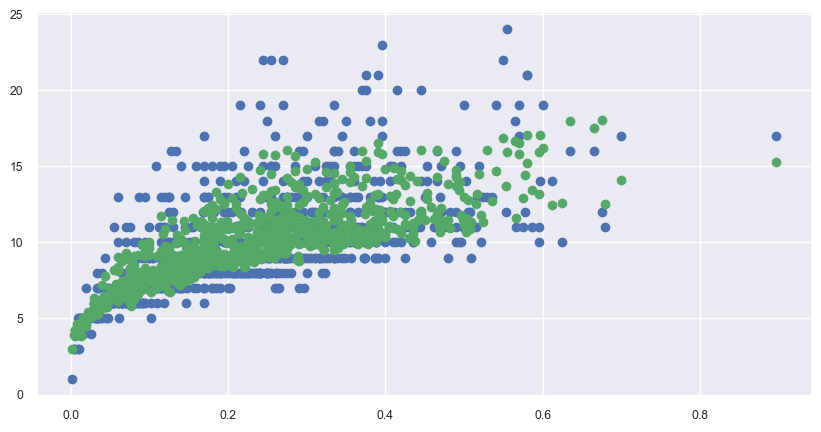

In [130]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='g', label='ry_preds')
plt.show()  

### SVR 회귀

In [131]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.79241921570007


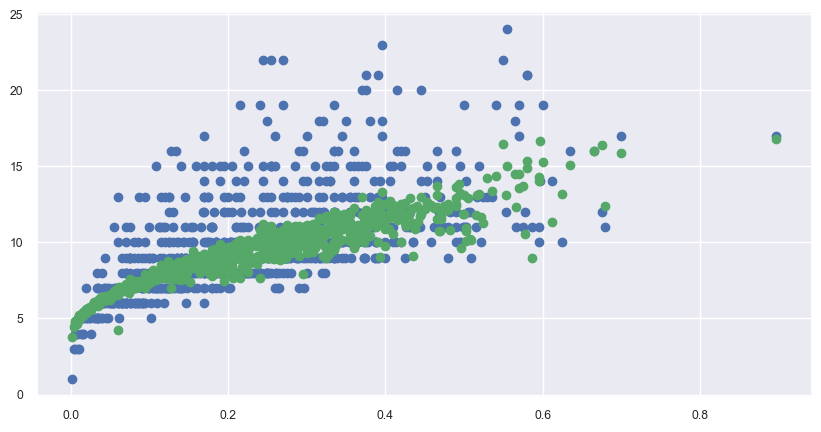

In [132]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='g', label='ly_preds')
plt.show()  

## 딥러닝 회귀

In [133]:
y = df['Rings']
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [134]:
X = df.drop(['Rings'], axis=1)
X = X.values
X

array([[ 1.    ,  0.455 ,  0.365 , ...,  0.2245,  0.101 ,  0.15  ],
       [ 1.    ,  0.35  ,  0.265 , ...,  0.0995,  0.0485,  0.07  ],
       [-1.    ,  0.53  ,  0.42  , ...,  0.2565,  0.1415,  0.21  ],
       ...,
       [ 1.    ,  0.6   ,  0.475 , ...,  0.5255,  0.2875,  0.308 ],
       [-1.    ,  0.625 ,  0.485 , ...,  0.531 ,  0.261 ,  0.296 ],
       [ 1.    ,  0.71  ,  0.555 , ...,  0.9455,  0.3765,  0.495 ]])

In [135]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                90        
                                                                 
 dense_41 (Dense)            (None, 30)                330       
                                                                 
 dense_42 (Dense)            (None, 30)                930       
                                                                 
 dense_43 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [147]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2/20
105/105 [==============================] - 0s 838us/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 3/20
105/105 [==============================] - 0s 819us/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 4/20
105/105 [==============================] - 0s 818us/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 5/20
105/105 [==============================] - 0s 805us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/20
105/105 [==============================] - 0s 811us/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 7/20
105/105 [==============================] - 0s 832us/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 8/20
105/105 [==============================] - 0s 833us/s

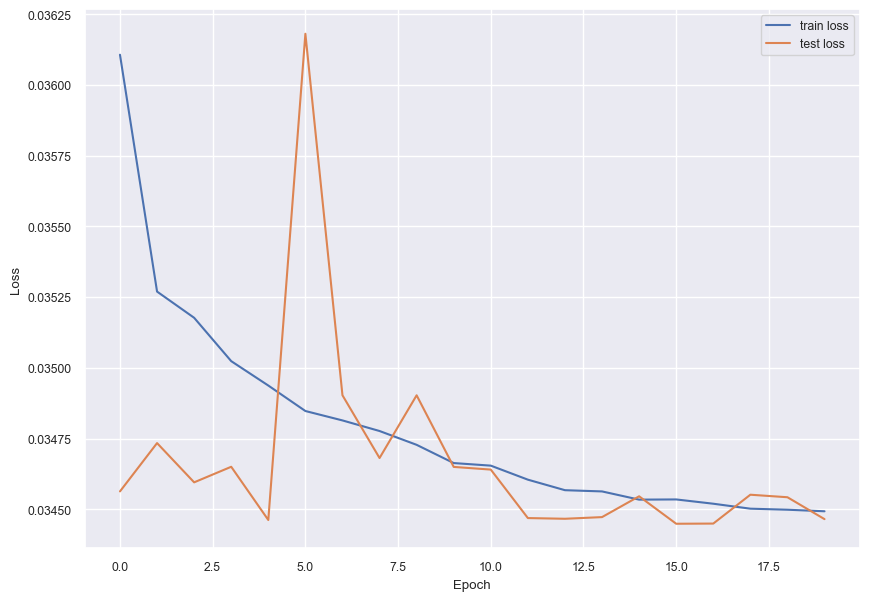

In [148]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [149]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 583us/step - loss: 0.0345 - mse: 0.0345


[0.03446536511182785, 0.03446536511182785]